# Coursera Capstone

### Introduction
In the following we present a decision tree classifier to predict the liklihood of the severity of an accident based upon weather conditions and lighting conditions. Additionally we involve the importance of speeding as an indicator that during adverse weather conditions one should be extra careful.

#### Business Impact
The idea here is to reinforce decisions being made around the qualtiy of the road. The model will reiforce that fact that the road and weather condition account for a relatively large amount of accidents, thus having a localized weather sensor would helpe to interpret better results in accident severity. 

### Data Preperation
Data was provided by the Coursera Capstone course

### Methodology 

To initialize, we import the data and necessary tools to begin interrogating the data. Then we turn each of our variables into discreet values to create a decision tree calssifier in modeling. 

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

print('Hello Capstone Project Course')

Hello Capstone Project Course


### Pulling in the data

The data is the presented data from the Coursera capstone. 

In [89]:
data = pd.read_csv('Data-Collisions.csv')
print(list(data.columns))

['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [90]:
collisions = data[['SPEEDING','SEVERITYCODE','LIGHTCOND','WEATHER']].copy()
collisions.head()

,SPEEDING,SEVERITYCODE,LIGHTCOND,WEATHER
0,NaN,2,Daylight,Overcast
1,NaN,1,Dark - Street Lights On,Raining
2,NaN,1,Daylight,Overcast
3,NaN,1,Daylight,Clear
4,NaN,2,Daylight,Raining


### Column inspection 
The idea is that we want to determine what the liklihood and predictability is that an accident is going to severe and life threatening dependent upon specific weather and location conditions. Additionally if the officers know that the incident involved speeding as a factor then we will assume that the incident would be more impactful. 

### Feature Engineering
Following we check the null values and turn our feature values into quantitative variables. 

#### SPEEDING

In [91]:
collisions['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

In [92]:
collisions['SPEEDING'].fillna(0, inplace = True)
collisions['SPEEDING'].replace('Y',1, inplace = True)
collisions['SPEEDING'].unique()

array([0, 1], dtype=int64)

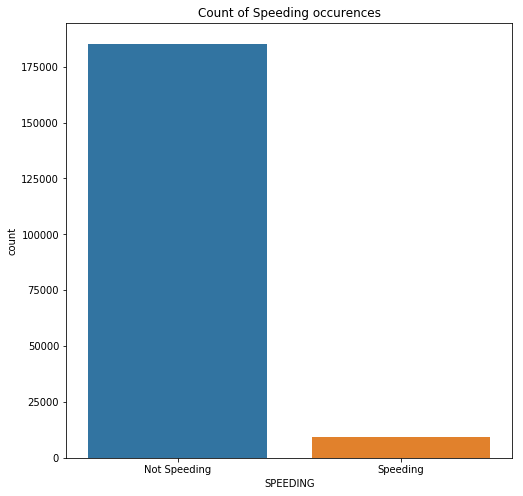

In [93]:
plt.figure(figsize=(8, 8))
x = collisions['SPEEDING'].replace(to_replace=[0, 1], value=['Not Speeding','Speeding'])
sns.countplot(x)
plt.title('Count of Speeding occurences')
plt.show()

#### SEVERITYCODE

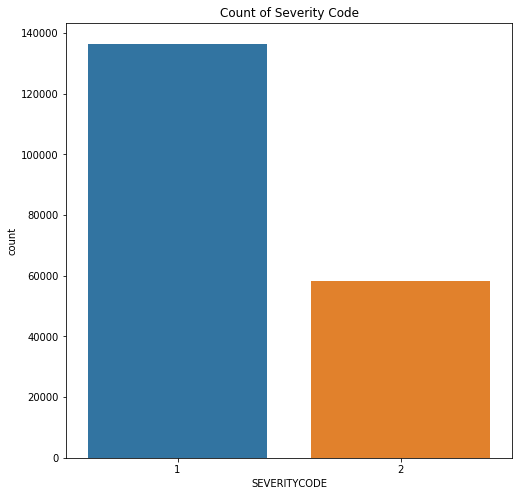

In [94]:
collisions['SEVERITYCODE'].unique()
plt.figure(figsize=(8, 8))
sns.countplot(collisions['SEVERITYCODE'])
plt.title('Count of Severity Code')
plt.show()

#### LIGHTCOND

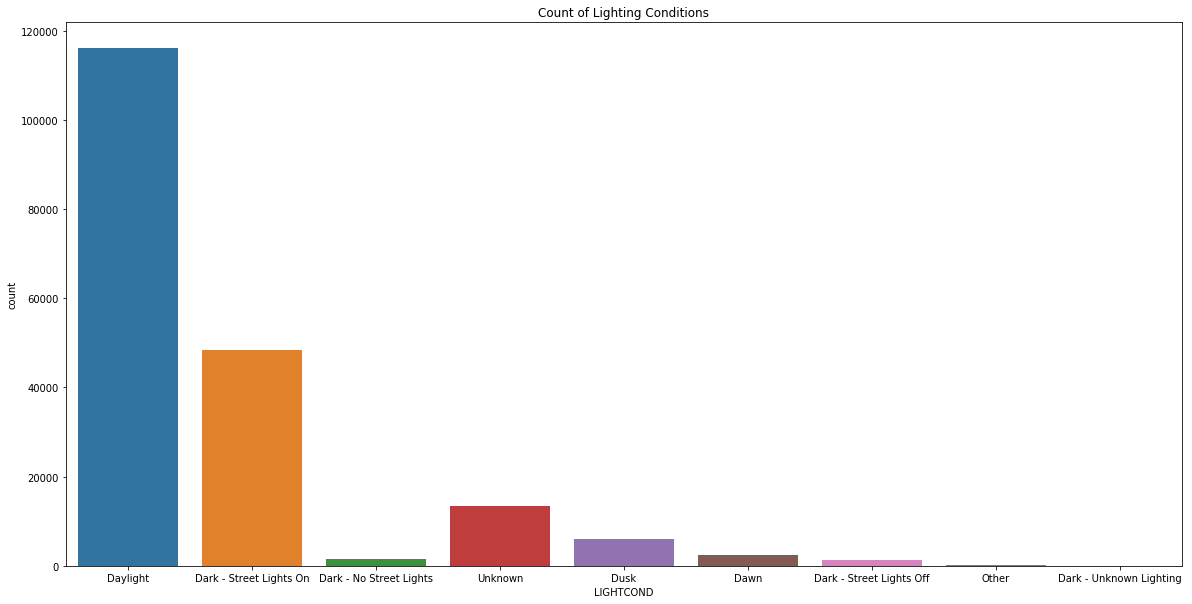

In [95]:
collisions['LIGHTCOND'].unique()
plt.figure(figsize=(20, 10))
sns.countplot(collisions['LIGHTCOND'])
plt.title('Count of Lighting Conditions')
plt.show()

In [96]:
collisions.replace({'LIGHTCOND' : {'Daylight' : 2, 'Dark - Street Lights On':1, 'Dark - No Street Lights': 0,
       'Dusk': 1, 'Dawn':1}}, inplace = True)                   
print(collisions['LIGHTCOND'].unique())

[2 1 0 nan 'Unknown' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


In [97]:
collisions.replace({'LIGHTCOND' : {'Dark - Street Lights Off':0,
       'Dark - Unknown Lighting':1, 'Unknown' :3 , 'Other' : 3 }}, inplace = True) 
collisions['LIGHTCOND'].fillna(3, inplace = True)
print(collisions['LIGHTCOND'].unique())

[2. 1. 0. 3.]


#### WEATHER
In the next feature we will create a new feature that combines the level of visibilty as clear = 0, moderate = 1 and bad = 2. Additionally we want to get the visibilty of light as a possible indicator or accidents as well. 

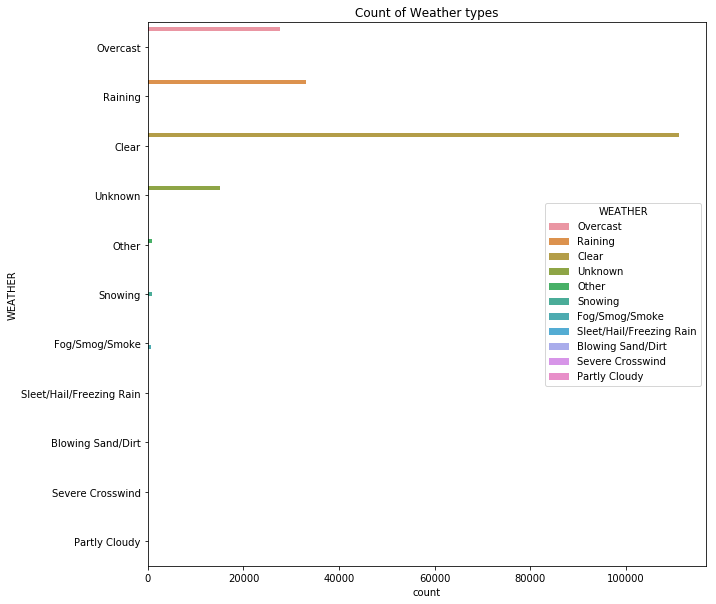

In [98]:
collisions['WEATHER'].unique()
plt.figure(figsize=(10, 10))
sns.countplot(y = collisions['WEATHER'], hue = collisions['WEATHER'], data = collisions['WEATHER'])
plt.title('Count of Weather types')
plt.show()

Each column in mind is of an object attribute, so we must transfer it to a dummy variables. We essentially want bad 

In [99]:
collisions.replace({'WEATHER' : {'Overcast':1, 'Raining':2, 'Clear':0, 'Snowing':2,
       'Fog/Smog/Smoke':2, 'Sleet/Hail/Freezing Rain':2, 'Blowing Sand/Dirt':2,
       'Severe Crosswind':2}}, inplace = True)
collisions['WEATHER'].head()

0    1
1    2
2    1
3    0
4    2
Name: WEATHER, dtype: object

In [100]:
collisions.replace({'WEATHER' : {'Partly Cloudy':1, 'Unknown' :3, 'Other' :3}}, inplace = True)

collisions['WEATHER'].fillna(3, inplace = True)
print(collisions['WEATHER'].unique())
collisions['WEATHER'].head()

[1. 2. 0. 3.]


0    1.0
1    2.0
2    1.0
3    0.0
4    2.0
Name: WEATHER, dtype: float64

In [101]:
collisions.head()

,SPEEDING,SEVERITYCODE,LIGHTCOND,WEATHER
0,0,2,2.0,1.0
1,0,1,1.0,2.0
2,0,1,2.0,1.0
3,0,1,2.0,0.0
4,0,2,2.0,2.0


### Model Training 

Next we train the model to fit on the data to determine the accuracy of its predictions. 

In [102]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics

feature_columns = ['SPEEDING','LIGHTCOND','WEATHER']
X = collisions[feature_columns]
y = collisions['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print("Completed...")

Completed...


In [103]:
tree = DTC(random_state = 1)
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Completed...")

Completed...


In [104]:
from sklearn.metrics import confusion_matrix as Conf_Mat
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
Conf_Mat(y_test, y_pred)

('Accuracy:', 0.7035889181877333)




array([[41091,     0],
       [17311,     0]], dtype=int64)

### Results 

The model is moderatly sufficient in the fact that if the conditions are met, then this will aid the quick decision making of deployment.  